In [450]:
import pandas as pd
import sklearn
import scipy
import numpy as np
import seaborn

## Download the data file

In [451]:
data = pd.read_csv("diabetes_data.csv")
PROCESSED_ACC = []

## Data Preprocessing

### a) Changing categorial data into binary values

In [452]:
# Change all categorial into binary values
# Male will be 0 and Female will be 1 (seems to make the models work better)
data = data.replace(["Yes", "No", "Male", "Female", "Positive", "Negative"], [1, 0, 0, 1, 1, 0])

### b) Change continuous "Age" column to binary

In [453]:
#Assess the mean and range of age
data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Age Distribution')

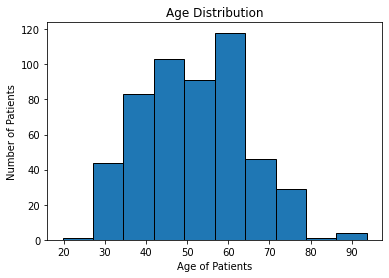

In [454]:
#See data distribution by age on histogram
import matplotlib.pyplot as plt
plt.hist(data['Age'], align="right", edgecolor='black')
plt.xlabel("Age of Patients")
plt.ylabel("Number of Patients")
plt.title("Age Distribution")

In [455]:
#Decide that 48 is a good age to split the data evenly
#you will want to only run this square once, or it will turn all values to 0. 
age = 48
data['Age'] = np.where(data['Age']<=age,0, data['Age'])
data['Age'] = np.where(data['Age']>age, 1, data['Age'])
data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.446154,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,0.497571,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection methods

<AxesSubplot:>

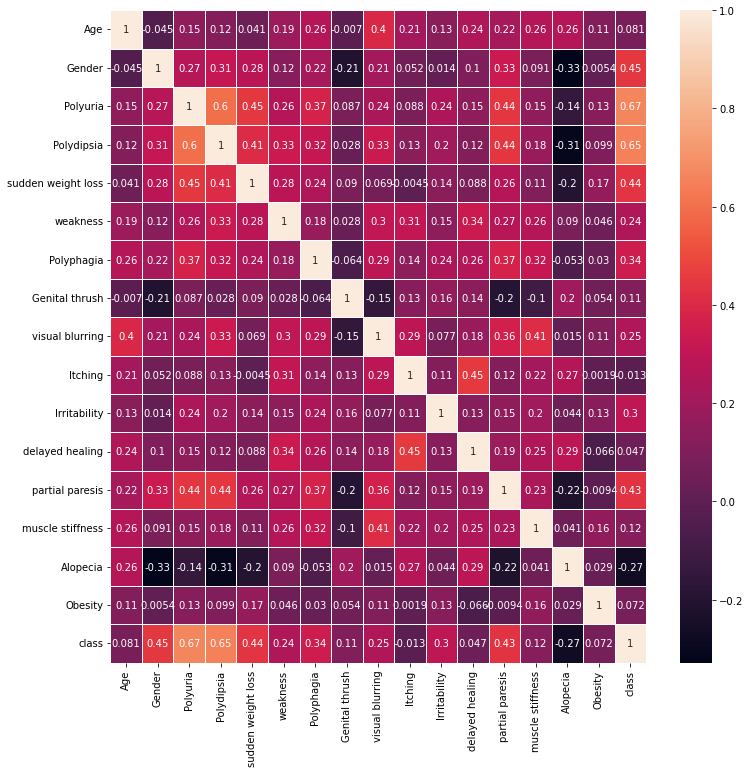

In [456]:
# First try Pearson's correlation
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
correlation = data.corr(method="pearson")
seaborn.heatmap(correlation, annot=True, linewidths=0.5, ax=ax)

In [457]:
for col in data:
    print(correlation[col].sort_values(ascending=False))
    print("\n")

Age                   1.000000
visual blurring       0.397107
muscle stiffness      0.263705
Alopecia              0.261688
Polyphagia            0.258368
delayed healing       0.243509
partial paresis       0.219232
Itching               0.209936
weakness              0.187936
Polyuria              0.153917
Irritability          0.133487
Polydipsia            0.117050
Obesity               0.110795
class                 0.081354
sudden weight loss    0.040675
Genital thrush       -0.007005
Gender               -0.045385
Name: Age, dtype: float64


Gender                1.000000
class                 0.449233
partial paresis       0.332288
Polydipsia            0.312262
sudden weight loss    0.281840
Polyuria              0.268894
Polyphagia            0.219968
visual blurring       0.208092
weakness              0.124490
delayed healing       0.101978
muscle stiffness      0.090542
Itching               0.052496
Irritability          0.013735
Obesity               0.005396
Age        

In [458]:
#Check for low variance features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(.90*(1-.90))
no_target = data.drop("class", axis=1)
selector.fit_transform(no_target)

array([[0, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [459]:
#use a chi-test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
col_num = 16
select_chi = SelectKBest(chi2, k="all")
select_chi.fit(data.iloc[:,:col_num].values, data.iloc[:, -1].values)
chi_scores = select_chi.scores_
minimum_score = min(chi_scores)
chi_scores
# np.where(chi_scores == minimum_score)

array([1.90614224e+00, 6.61938802e+01, 1.16184593e+02, 1.20785515e+02,
       5.77493088e+01, 1.27242623e+01, 3.31984177e+01, 4.91400862e+00,
       1.81245708e+01, 4.78260870e-02, 3.53341270e+01, 6.20188285e-01,
       5.53142857e+01, 4.87500000e+00, 2.44027933e+01, 2.25028409e+00])

In [460]:
#Itching has the lowest, chi-test score, so we can get rid of itching. 
if 'Itching' in data.columns:
    data = data.drop(columns=['Itching'])

## Model 1) KNN, KNN-Weighted

In [461]:
#split the data into test set(20%) and training set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=43)
#make a copy of training set just incase we accidentally mutate data
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

In [462]:
from sklearn.neighbors import KNeighborsClassifier
#default of number of neighbors
col_num = len(data.columns) - 1
num_neighbors = 5
train_features = train_set_copy.iloc[:,:col_num].values
train_target = train_set_copy.iloc[:, -1].values
neigh = KNeighborsClassifier(n_neighbors = num_neighbors)
neigh.fit(train_features, train_target)

KNeighborsClassifier()

In [463]:
#Below is KNN weighted
neigh_weighted = KNeighborsClassifier(n_neighbors = num_neighbors, weights="distance")
neigh_weighted.fit(train_features, train_target)

KNeighborsClassifier(weights='distance')

### Use Analysis of n-fold, cross validation, and confusion matrix

In [464]:
#Test accuracy
from sklearn.metrics import accuracy_score
#observe accuracy for KNN
test_features = test_set_copy.iloc[:, :col_num].values
knn_predictions = neigh.predict(test_features)
knn_weighted_predictions = neigh_weighted.predict(test_features)
actual = test_set_copy.iloc[:, -1]
#observe accuracy for KNN weighted
knn_acc = accuracy_score(knn_predictions, actual)
knn_weighted = accuracy_score(knn_weighted_predictions, actual)
print("KNN score: ", knn_acc)
print("KNN weighted score: ", knn_weighted)
PROCESSED_ACC.append(knn_weighted)

KNN score:  0.9038461538461539
KNN weighted score:  0.9230769230769231


In [465]:
# function to plot KNN algorithm that uses Scikit-learn. 
import matplotlib.pyplot as plt
def plot_sklearn_knn (weighted="uniform"):
    k_values = []
    error_rate = []
    for i in range(1, 30):
        k_values.append(i)
        neigh = KNeighborsClassifier(n_neighbors = i, weights=weighted)
        neigh.fit(train_set_copy.iloc[:,:col_num].values, train_set_copy.iloc[:, -1].values)
        predictions = neigh.predict(test_set_copy.iloc[:, :-1].values)
        actual = test_set_copy.iloc[:, -1]
        error = 1 - accuracy_score(predictions, actual)
        error_rate.append(error)
    plt.xlabel("k-values")
    plt.ylabel("Error Rate")
    plt.title("Using Sklearn KNN")
    plt.plot(k_values, error_rate)
    plt.show()
        

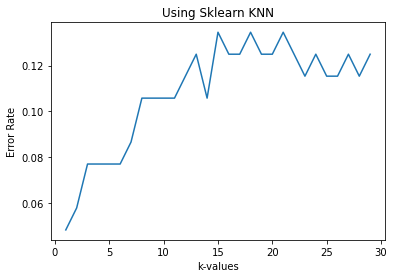

In [466]:
plot_sklearn_knn("distance")        

In [467]:
#set number of neighbors to 5, optimal value we saw from analysis. 
num_neighbors = 5
neigh = KNeighborsClassifier(n_neighbors = num_neighbors)
X_values = train_set_copy.iloc[:,:col_num].values
Y_values = train_set_copy.iloc[:, -1].values
neigh.fit(X_values, Y_values)
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,1,1
1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1
2,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1
3,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1
4,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1
516,0,1,1,1,1,1,1,0,0,1,1,1,0,0,0,1
517,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1
518,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0


In [468]:
#nfold cross validation for KNN weighted
from sklearn.model_selection import cross_val_score
CV = 8
scores_weighted = cross_val_score(neigh_weighted, train_features, train_target, cv = CV)
print(f"Scores: {scores_weighted}")
print(f"Mean: {scores_weighted.mean()}")
print(f"Standard Deviation: {scores_weighted.std()}")

Scores: [0.92307692 0.96153846 0.90384615 0.92307692 0.98076923 0.94230769
 0.96153846 0.94230769]
Mean: 0.9423076923076923
Standard Deviation: 0.023552785988299775


In [469]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Confusion matrix for KNN weighted
def confusion_matrix_learn (actual, predictions):
    neigh_confusion_matrix = confusion_matrix(actual, predictions)
    classification = classification_report(actual, predictions)
    print(neigh_confusion_matrix)
    print(classification)
confusion_matrix_learn(actual, knn_weighted_predictions)

[[36  3]
 [ 5 60]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.95      0.92      0.94        65

    accuracy                           0.92       104
   macro avg       0.92      0.92      0.92       104
weighted avg       0.92      0.92      0.92       104



## Model 2) Naive Bayes

In [470]:
## Fit to naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_features, train_target)

GaussianNB()

In [471]:
## Observe initial accuracy
naive_predictions = gnb.predict(test_features)
naive_acc = accuracy_score(naive_predictions, actual)
print(f"Naive Bayes Accuracy: {naive_acc}" )
PROCESSED_ACC.append(naive_acc)

Naive Bayes Accuracy: 0.9038461538461539


In [472]:
### Use Analysis of n-fold, cross validation, and confusion matrix
naive_scores = cross_val_score(gnb, X_values, Y_values, cv = CV)
print(f"Scores: {naive_scores}")
print(f"Mean: {naive_scores.mean()}")
print(f"Standard Deviation: {naive_scores.std()}")

Scores: [0.88461538 0.82692308 0.90384615 0.86538462 0.92307692 0.90384615
 0.94230769 0.90384615]
Mean: 0.8942307692307693
Standard Deviation: 0.033308669376324575


In [473]:
confusion_matrix_learn(actual, naive_predictions)

[[34  5]
 [ 5 60]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.92      0.92      0.92        65

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.90      0.90      0.90       104



## Model 3) SVM 

In [474]:
from sklearn import svm
SVM_Clss = svm.SVC()
SVM_Clss.fit(train_features, train_target)

SVC()

In [475]:
#observe accuracy for SVM
SVM_predictions = SVM_Clss.predict(test_features)
svm_acc = accuracy_score(SVM_predictions, actual)
print(f"SVM acc: {svm_acc}" )
PROCESSED_ACC.append(svm_acc)

SVM acc: 0.9519230769230769


In [476]:
### Use Analysis of n-fold, cross validation, and confusion matrix
svm_scores = cross_val_score(SVM_Clss, X_values, Y_values, cv = CV)
print(f"Scores: {svm_scores}")
print(f"Mean: {svm_scores.mean()}")
print(f"Standard Deviation: {svm_scores.std()}")

Scores: [0.98076923 1.         0.88461538 1.         0.98076923 0.94230769
 0.98076923 0.96153846]
Mean: 0.9663461538461537
Standard Deviation: 0.035654800418729156


In [477]:
confusion_matrix_learn(actual, SVM_predictions)

[[36  3]
 [ 2 63]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.95      0.97      0.96        65

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



## Model 4) Decision Tree

In [478]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier(random_state=0)
dec_tree = dec_tree.fit(train_features, train_target)
dec_tree_predictions = dec_tree.predict(test_features)
dec_acc = accuracy_score(dec_tree_predictions, actual)
print(f"Decision Tree Accuracy: {dec_acc}" )
PROCESSED_ACC.append(dec_acc)

Decision Tree Accuracy: 0.9423076923076923


In [479]:
### Use Analysis of n-fold, cross validation, and confusion matrix
dec_scores = cross_val_score(dec_tree, X_values, Y_values, cv = CV)
print(f"Scores: {dec_scores}")
print(f"Mean: {dec_scores.mean()}")
print(f"Standard Deviation: {dec_scores.std()}")

Scores: [0.98076923 0.96153846 0.88461538 0.98076923 0.96153846 0.92307692
 0.96153846 0.92307692]
Mean: 0.9471153846153846
Standard Deviation: 0.03152614675145192


In [480]:
confusion_matrix_learn(actual, dec_tree_predictions)

[[36  3]
 [ 3 62]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.95      0.95      0.95        65

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



## Charts and Analysis

### Baseline Vs Processed Data

In [481]:
## baselines for KNN, Bayes, SVM, and Dec tree from Baseline.ipynb
baseline_acc = [0.9326923076923077, 0.8942307692307693, 0.625, 0.9807692307692307]
PROCESSED_ACC

for i in range(0, len(baseline_acc)):
    baseline_acc[i] = float(format(baseline_acc[i], ".2f"))
for i in range(0, len(PROCESSED_ACC)):
    PROCESSED_ACC[i] = float(format(PROCESSED_ACC[i], ".2f"))

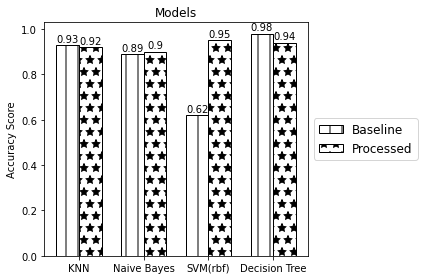

In [482]:
labels = ["KNN", "Naive Bayes", "SVM(rbf)", "Decision Tree"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, baseline_acc, width, label='Baseline', hatch='|', color="white", edgecolor="black")
rects2 = ax.bar(x + width/2, PROCESSED_ACC, width, label='Processed', hatch='*', color="white", edgecolor="black")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score')
ax.set_title('Models')
ax.set_xticks(x, labels)

ax.bar_label(rects1,padding=1)
ax.bar_label(rects2,padding=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
fig.tight_layout()
plt.savefig('acc_plot.tif')
plt.show()

### Box and Whisker for Cross Validation of Processed Data

<ipython-input-483-05b102286b11>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  cd_ax.set_xticklabels(["Weighted KNN", "Naive Bayes", "SVM(rbf)", "Decision Tree"])


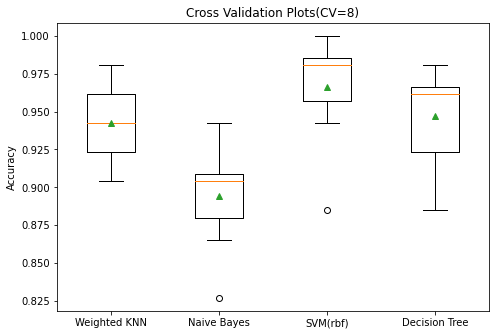

In [483]:
import matplotlib.pyplot as plt
import numpy as np

cd_data = [scores_weighted, naive_scores, svm_scores, dec_scores]
 
cd_fig = plt.figure()
# Creating axes instance
cd_ax = cd_fig.add_axes([0, 0, 1, 1])
cd_ax.set_title("Cross Validation Plots(CV=8)")
cd_ax.set_ylabel('Accuracy')
cd_ax.set_xticklabels(["Weighted KNN", "Naive Bayes", "SVM(rbf)", "Decision Tree"])

 
# Creating plot
bp = cd_ax.boxplot(cd_data, showmeans=True)
 
# show plot
# fig.tight_layout()
# plt.savefig('boxplot.tif', bbox_inches="tight")
plt.show()

<ipython-input-484-0c42b710b95f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


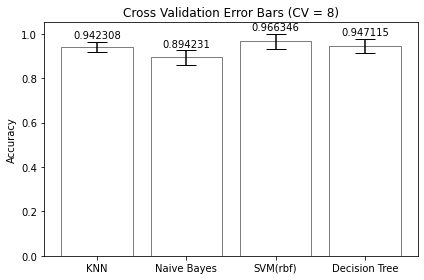

In [484]:
cross_mean_data = [scores_weighted.mean(), naive_scores.mean(), svm_scores.mean(), dec_scores.mean()]
cross_mean_std = [scores_weighted.std(), naive_scores.std(), svm_scores.std(), dec_scores.std()]
x_labels = ["KNN", "Naive Bayes", "SVM(rbf)", "Decision Tree"]
# Build the plot
fig, ax = plt.subplots()
cross_bar = ax.bar(x_labels, cross_mean_data,
       yerr=cross_mean_std,
       align='center',
       alpha=0.5,
       ecolor='black',
       color="white",
       edgecolor="black",
       capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticklabels(labels)
ax.set_title('Cross Validation Error Bars (CV = 8)')
ax.bar_label(cross_bar,padding=1)

# Save the figure and show
plt.tight_layout()
plt.savefig('cverrorbar.tif', bbox_inches="tight")
plt.show()